In [18]:
import pandas as pd
import numpy as np

In [2]:
import tokenize
import ast
from nltk.tokenize import RegexpTokenizer
import astor

In [20]:
tree = ast.parse("print('Hello world!')")
print(tree)

In [21]:
print(ast.dump(tree))

Module(body=[Expr(value=Call(func=Name(id='print', ctx=Load()), args=[Str(s='Hello world!')], keywords=[]))])


In [22]:
class FuncLister(ast.NodeVisitor):
    def visit_FunctionDef(self, node):
        print(node.name)
        self.generic_visit(node)
    def visit_ClassDef(self,node):
        print(node.name)
        self.generic_visit(node)
    

In [3]:
class FuncParser(ast.NodeVisitor):
    def visit_Load(self, node): pass
    #def visit_Str(self, node): pass
    #def visit_Num(self, node): pass
    def visit_Store(self, node): pass
    def visit_Module(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    #def visit_op(self, node): 
       # ast.NodeVisitor.generic_visit(self, node)
    def visit_Call(self, node):
        file_contents.append(["Call"])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Expr(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Assign(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_BinOp(self,node):
        temp = (node.op)
        op = "BinOp: "+temp.__class__.__name__ +"()"
        file_contents.append([op])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_arg(self, node): 
        n6 = "arg:"+ (node.arg)
        file_contents.append([n6])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Import(self, node): 
        ast.NodeVisitor.generic_visit(self, node)
    def visit_BoolOp(self,node):
        temp = node.op
        n4 = "BoolOp: "+temp.__class__.__name__ +"()"
        file_contents.append([n4])
        ast.NodeVisitor.generic_visit(self, node)
    def visit_keyword(self, node): 
        file_contents.append([node.arg])
        #print (node.arg)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_ImportFrom(self, node):
        n3= (node.__class__.__name__)+":"+ (node.module)
        file_contents.append([n3])
        #print (node.__class__.__name__ ,':' , node.module)
        #print (node.module)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_alias(self, node): 
        n1 = "Import:"+ (node.name)
        file_contents.append([n1])
        if(node.asname != None):
            n2 = "ImportFrom:"+ (node.asname)
            file_contents.append([n2])
        #print ('alias.name:',node.name)
        #print ('alias.asname:',node.asname)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Name(self, node):
        temp ="Name:"+node.id
        file_contents.append([temp])
        #print (node.id)
        ast.NodeVisitor.generic_visit(self, node)
    def visit_Attribute(self, node): 
        file_contents.append([node.attr])
        #print (node.attr)
        ast.NodeVisitor.generic_visit(self, node)
    #def visit_orelse(self,node):
         #file_contents.append([node.__class__.__name__])
   # def visit_Str(self, node): 
       # print ('Str:', node.s)
    def generic_visit(self, node):
        file_contents.append([node.__class__.__name__])
        #print (node.__class__.__name__)
        ast.NodeVisitor.generic_visit(self, node)

In [223]:
#with tokenize.open("test.py") as sf:  # need the tokenize.open for source files and not a string
    #source_file_contents = sf.read()

#module = ast.parse(source_file_contents)
#print(ast.dump(code))

In [22]:
print(ast.dump(before))

Module(body=[FunctionDef(name='Plus', args=arguments(args=[arg(arg='num', annotation=None), arg(arg='index', annotation=None)], vararg=None, kwonlyargs=[], kw_defaults=[], kwarg=None, defaults=[]), body=[Assign(targets=[Name(id='Result', ctx=Store())], value=BinOp(left=Name(id='num', ctx=Load()), op=Add(), right=Subscript(value=Name(id='Dataset', ctx=Load()), slice=Index(value=UnaryOp(op=USub(), operand=Num(n=1))), ctx=Load())))], decorator_list=[], returns=None)])


In [95]:
for node in before.body:
    print(node.__class__.__name__)

FunctionDef


In [21]:
with tokenize.open("test.py") as sf:  # need the tokenize.open for source files and not a string
    source_file_before = sf.read()

before = ast.parse(source_file_before)

In [17]:
x = FuncParser()
t = ast.parse(before)
file_contents = []
x.visit(t)

In [9]:
file_contents

[['FunctionDef'],
 ['arguments'],
 ['arg:i'],
 ['Name:x'],
 ['BinOp: Add()'],
 ['Num'],
 ['Add'],
 ['Subscript'],
 ['Name:Data'],
 ['Index'],
 ['Name:i']]

In [135]:
for node in ast.walk(t):
    print(node.__class__.__name__)

Module
FunctionDef
arguments
Assign
arg
arg
Name
BinOp
Store
Name
Add
Num
Load


In [293]:
dtobj_bfore = pd.DataFrame(file_contents, columns=['token'])

t_before =pd.DataFrame(dtobj_bfore['token'].value_counts())
t_before

,token
keys,4
FunctionCall,4
mapping,3
FunctionDef,1
OrderedDict,1
isinstance,1
BoolOp: Or(),1
Return,1
arguments,1
try_sort,1


In [227]:
with tokenize.open("after-commit.py") as sf:  # need the tokenize.open for source files and not a string
    source_file_after = sf.read()

after = ast.parse(source_file_after)

In [296]:
print(ast.dump(before))

Module(body=[FunctionDef(name='dict_keys_to_ordered_list', args=arguments(args=[arg(arg='mapping', annotation=None)], vararg=None, kwonlyargs=[], kw_defaults=[], kwarg=None, defaults=[]), body=[If(test=BoolOp(op=Or(), values=[Name(id='PY36', ctx=Load()), Call(func=Name(id='isinstance', ctx=Load()), args=[Name(id='mapping', ctx=Load()), Name(id='OrderedDict', ctx=Load())], keywords=[])]), body=[Assign(targets=[Name(id='keys', ctx=Store())], value=Call(func=Name(id='list', ctx=Load()), args=[Call(func=Attribute(value=Name(id='mapping', ctx=Load()), attr='keys', ctx=Load()), args=[], keywords=[])], keywords=[]))], orelse=[Assign(targets=[Name(id='keys', ctx=Store())], value=Call(func=Name(id='try_sort', ctx=Load()), args=[Name(id='mapping', ctx=Load())], keywords=[]))]), Return(value=Name(id='keys', ctx=Load()))], decorator_list=[], returns=None)])


In [269]:
z = FuncParser()
ti = ast.parse(after)
file_contents = []
x.visit(ti)

In [270]:
dtobj_after = pd.DataFrame(file_contents, columns=['token'])

t_after =pd.DataFrame(dtobj_after['token'].value_counts())
t_after

,token
FunctionCall,85
Return,48
If,38
Str,30
obj,28
arguments,28
FunctionDef,28
Compare,24
NameConstant,23
isinstance,21


In [271]:
df = t_after.subtract(t_before)

In [279]:
diff= df[(df.select_dtypes(include=['number']) != 0).any(1)]
diff=diff.fillna(0)
diff.abs()

,token
BoolOp: Or(),1.0
FunctionCall,4.0
FunctionDef,1.0
If,1.0
Import:OrderedDict,0.0
Import:PY36,0.0
ImportFrom:pandas.compat,0.0
Or,1.0
OrderedDict,0.0
PY36,0.0


In [282]:
df2 = t_after.subtract(t_before)

In [283]:
df2[(df2.select_dtypes(include=['number']) != 0).any(1)]

,token
BoolOp: Or(),-1.0
FunctionCall,-4.0
FunctionDef,-1.0
If,-1.0
Import:OrderedDict,NaN
Import:PY36,NaN
ImportFrom:pandas.compat,NaN
Or,-1.0
OrderedDict,NaN
PY36,NaN


In [171]:
for node in ast.walk(module):
    if isinstance(node, ast.ClassDef):
        print(node.name)
    elif isinstance(node, ast.FunctionDef):
            print(node.name)

FuncLister
visit_FunctionDef


In [452]:
 # need the tokenize.open for source files and not a string
    
    #print(file_contents)
    #code = parser.suite(file_contents)

#code = ast.parse(file_contents)

#code = ast.parse('if name.islower() and not name.startswith(__) and callable(models.__dict__[name]')

In [486]:

cnt = 1
#num_lines = sum(1 for line in open('test.py') if line.rstrip())
#file_contents=['none']*num_lines
file_contents = []
with open("test.py") as sf:
    for cnt,line in enumerate(sf):
        file_contents.append(line)


In [487]:
file_contents

[' idxpos = find_valid_index(self._values, how)\n',
 '        if idxpos is None:']

In [108]:
class v(ast.NodeVisitor):
    def generic_visit(self,node):
        print(node.name)
        ast.NodeVisitor.generic_visit(self,node)

In [121]:
x = v()
t = ast.parse("d[x] += v[y, x]")

In [122]:
print(ast.dump(t))

Module(body=[AugAssign(target=Subscript(value=Name(id='d', ctx=Load()), slice=Index(value=Name(id='x', ctx=Load())), ctx=Store()), op=Add(), value=Subscript(value=Name(id='v', ctx=Load()), slice=Index(value=Tuple(elts=[Name(id='y', ctx=Load()), Name(id='x', ctx=Load())], ctx=Load())), ctx=Load()))])


In [12]:
import tokenize
import token

In [13]:
tokens = tokenize.generate_tokens("before-commit.py")

In [14]:
 print (t.type for t in tokens)

<generator object <genexpr> at 0x000002B04F4FE048>


In [12]:
tokens = []
with open('test.py', 'rb') as f:
    for five_tuple in tokenize.tokenize(f.readline):
        tokens.append(five_tuple.string)
print(tokens)
        #token.tok_name[five_tuple.type],","
        #print(five_tuple.type)
        #print(five_tuple.string)
        #print(five_tuple.start)
       # print(five_tuple.end)
       # print(five_tuple.line)

['utf-8', 'def', 'plus', '(', 'i', ')', ':', '\r\n', ' ', 'x', '=', '243', '+', 'Data', '[', 'i', ']', '', '', '']


In [1]:
import showast

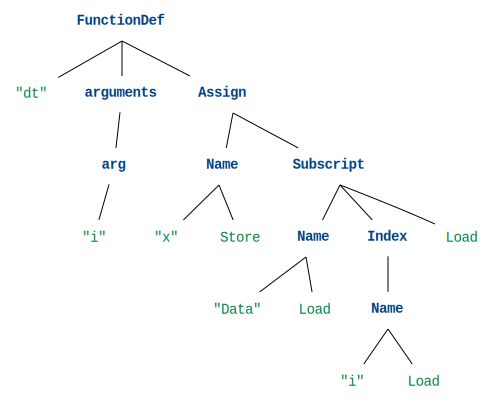

In [5]:
%%showast
def dt(i):
    x= Data[i]

In [6]:
def dt(i):
    x= Data[i]